<a href="https://colab.research.google.com/github/Bucky25/Neural-Network-based-approach-for-software-reliability-estimation-/blob/main/FinalProjectcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from random import uniform
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization


In [ ]:
dataset_file = "dataset1.csv"
df = pd.read_csv(dataset_file)
df.index = df['Ti']
df = df.drop(['Ti'], axis=1)
df.head()

,Ci,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
Ti,,,,,,
5,342,NaN,NaN,NaN,NaN,NaN
10,571,NaN,NaN,NaN,NaN,NaN
15,968,NaN,NaN,NaN,NaN,NaN
20,1986,NaN,NaN,NaN,NaN,NaN
25,3098,NaN,NaN,NaN,NaN,NaN


In [ ]:
class FeatureDataset(Dataset):
  def __init__ (self, file_name):
    # read csv file
    trainset = pd.read_csv('./dataset1.csv')

    X = trainset.iloc[:,0:1]
    Y = trainset.iloc[:,1]
    X_train = X[:int(X.shape[0]*0.9)]
    X_test = X[int(X.shape[0]*0.9):]
    y_train = Y[:int(X.shape[0]*0.9)]
    y_test = Y[int(X.shape[0]*0.9):]
    x_train = (X_train - X.min())/(X.max()-X.min())
    self.x_train = torch.tensor(x_train.values, dtype=torch.float32)
    self.y_train = torch.tensor(y_train)

  def __len__(self):
    return len(self.y_train)
  
  def __getitem__(self, idx):
    return self.x_train[idx], self.y_train[idx]

In [ ]:
feature_set = FeatureDataset('dataset1.csv')

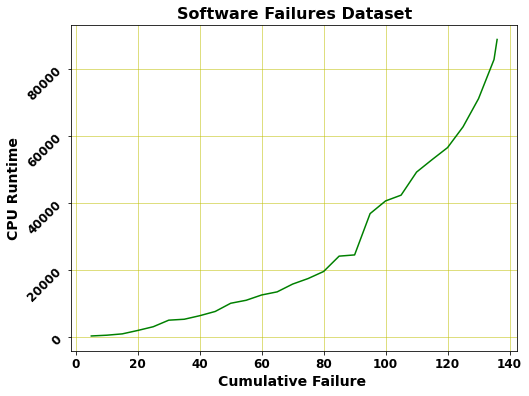

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(8, 6))
plt.plot(df, color='g')
plt.title('Software Failures Dataset', weight='bold', fontsize=16)
plt.ylabel('CPU Runtime', weight='bold', fontsize=14)
plt.xlabel('Cumulative Failure ', weight='bold', fontsize=14)
plt.yticks(weight='bold', fontsize=12, rotation=45)
plt.xticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)

In [ ]:

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(1,1)
        self.fc2 = nn.Linear(1,1)
        self.fc3 = nn.Linear(1,1)
        self.fc4 = nn.Linear(3,1)

        self.sig = nn.Sigmoid()

    
    def forward(self, x):
        o1 = self.fc1(x)
        o1 = (1- torch.exp(-o1))
        o2 = self.fc2(x)  
        o2 = 1-(1+o2)*torch.exp(-o2)      
        o3 = self.fc3(x)
        o3 = self.sig(o3)
        
        out = torch.cat((o1,o2,o3),-1)
        final = self.fc4(out)
        return final

In [ ]:
model = NeuralNet()

In [ ]:
from torchvision import models
from torchsummary import summary
print(model)

NeuralNet(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
  (fc2): Linear(in_features=1, out_features=1, bias=True)
  (fc3): Linear(in_features=1, out_features=1, bias=True)
  (fc4): Linear(in_features=3, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=feature_set, batch_size=1,
                                           shuffle=False)

In [ ]:
next(iter(train_loader))

[tensor([[0.]]), tensor([5])]

In [ ]:

# Train the model
# model.to()

#define loss function and optimizer
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=.001)

epochs=10000
clip_value=5
for e in range(epochs):
  current_loss = 0

  #training batch
  for i, data in enumerate(train_loader,0):
    # Get and prepare inputs
    inputs, targets = data
    inputs, targets = inputs.float(), targets.float()
    # Zero the gradients
    optimizer.zero_grad()
    
    # Perform forward pass
    outputs = model(inputs)
    targets = targets.unsqueeze(1).unsqueeze(2)
    
    # Compute loss
    loss = loss_func(outputs, targets)
    
    # Perform backward pass
    loss.backward()
    # torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)
    # Perform optimization
    optimizer.step()
    # Print statistics
    # current_loss += loss.item()
    current_loss += (loss.item())
  print('Loss after an epoch %5d: %.3f' %(e, (current_loss)))
  current_loss=0




/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([1, 1, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Streaming output truncated to the last 5000 lines.
Loss after an epoch  5000: 75.026
Loss after an epoch  5001: 79.455
Loss after an epoch  5002: 80.887
Loss after an epoch  5003: 79.948
Loss after an epoch  5004: 74.467
Loss after an epoch  5005: 80.854
Loss after an epoch  5006: 80.433
Loss after an epoch  5007: 80.743
Loss after an epoch  5008: 75.095
Loss after an epoch  5009: 74.950
Loss after an epoch  5010: 74.360
Loss after an epoch  5011: 80.786
Loss after an epoch  5012: 80.361
Loss after an epoch  5013: 80.675
Loss after an epoch  5014: 74.964
Loss after an epoch  5015: 74.277
Loss after an epoch  5016: 80.716
Loss after an epoch  5017: 80.803
Loss after an epoch  5018: 74.383
Loss after an epoch  5019: 80.606
Loss after an epoch  5020: 74.832
Loss after an epoch  5021: 74.173
Loss after an epoch  5022: 80.647
Loss after an epoch  5023: 80.160
Loss after an epoch  5024: 80.534
Loss after an epoch  5025: 74.846
Loss after an epoch  5026: 74.699
Loss after an epoch  5027: 79.1

In [ ]:
#testing model from one input
pred = torch.tensor([float(.9)])
output = model(pred)
print(output)



tensor([130.0797], grad_fn=<AddBackward0>)


In [ ]:
trainset1 = pd.read_csv('./dataset1.csv')
X = trainset1.iloc[:,0:1]
Y = trainset1.iloc[:,1]
X_train = X[:int(X.shape[0]*0.9)]
X_test = X[int(X.shape[0]):]
y_train = Y[:int(X.shape[0]*0.9)]
y_test = Y[int(X.shape[0]*0.9):]
X1 = trainset1.iloc[:,0:1]
x_test1 = (X1 - X.min())/(X.max()-X.min())
print(x_test1)


          Ci
0   0.000000
1   0.002592
2   0.007086
3   0.018610
4   0.031198
5   0.053283
6   0.056396
7   0.068350
8   0.082658
9   0.110335
10  0.120444
11  0.138295
12  0.148789
13  0.175051
14  0.193751
15  0.217501
16  0.269244
17  0.273387
18  0.412690
19  0.455490
20  0.474915
21  0.552739
22  0.594668
23  0.635284
24  0.705332
25  0.800328
26  0.932307
27  1.000000


In [ ]:

y_pred=[]
for i in x_test1.values:
  pred1 = torch.tensor([float(i)])
  output1 = model(pred1)
  y_pred.append(output1.item())
print(y_pred)

[12.353981018066406, 13.400169372558594, 15.226150512695312, 19.946842193603516, 25.09607696533203, 33.89195251464844, 35.09354782104492, 39.59745407104492, 44.73321533203125, 53.79090118408203, 56.79904556274414, 61.72015380859375, 64.38507080078125, 70.35392761230469, 74.0376205444336, 78.11012268066406, 85.05047607421875, 85.51231384277344, 97.0283432006836, 100.40413665771484, 102.11241149902344, 110.25923919677734, 115.07989501953125, 119.40229797363281, 124.98456573486328, 128.7362518310547, 130.26564025878906, 130.48011779785156]


In [ ]:
print(X)

       Ci
0     342
1     571
2     968
3    1986
4    3098
5    5049
6    5324
7    6380
8    7644
9   10089
10  10982
11  12559
12  13486
13  15806
14  17458
15  19556
16  24127
17  24493
18  36799
19  40580
20  42296
21  49171
22  52875
23  56463
24  62651
25  71043
26  82702
27  88682


In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error, median_absolute_error

MAE = mean_absolute_error(Y, y_pred)
MSE = mean_squared_error(Y, y_pred)
MedAE = median_absolute_error(Y, y_pred)
MaxErr = max_error(Y, y_pred)


print('Mean Abs Err for the test set:', round(MAE,4))
print('Mean Sq Err for the test set:', round(MSE,4))
print('Median Abs Err for the test set:', round(MedAE,4))
print('Max Err for the test set:', round(MaxErr,4))

Mean Abs Err for the test set: 1.7587
Mean Sq Err for the test set: 6.9404
Median Abs Err for the test set: 0.7887
Max Err for the test set: 7.354


In [25]:
# er=np.concatenate((y_t,y_pred),axis=0)
# er=er
y_pred=np.array(y_pred)
# train_plt=np.concatenate((X, y_train.values.reshape(-1,1)),axis=1)
test_plt=np.concatenate((X,y_pred.reshape(-1,1)),axis=1)
# df2=np.concatenate((X,er.reshape(-1,1)),axis=1)
print(test_plt)


[[3.42000000e+02 1.23539810e+01]
 [5.71000000e+02 1.34001694e+01]
 [9.68000000e+02 1.52261505e+01]
 [1.98600000e+03 1.99468422e+01]
 [3.09800000e+03 2.50960770e+01]
 [5.04900000e+03 3.38919525e+01]
 [5.32400000e+03 3.50935478e+01]
 [6.38000000e+03 3.95974541e+01]
 [7.64400000e+03 4.47332153e+01]
 [1.00890000e+04 5.37909012e+01]
 [1.09820000e+04 5.67990456e+01]
 [1.25590000e+04 6.17201538e+01]
 [1.34860000e+04 6.43850708e+01]
 [1.58060000e+04 7.03539276e+01]
 [1.74580000e+04 7.40376205e+01]
 [1.95560000e+04 7.81101227e+01]
 [2.41270000e+04 8.50504761e+01]
 [2.44930000e+04 8.55123138e+01]
 [3.67990000e+04 9.70283432e+01]
 [4.05800000e+04 1.00404137e+02]
 [4.22960000e+04 1.02112411e+02]
 [4.91710000e+04 1.10259239e+02]
 [5.28750000e+04 1.15079895e+02]
 [5.64630000e+04 1.19402298e+02]
 [6.26510000e+04 1.24984566e+02]
 [7.10430000e+04 1.28736252e+02]
 [8.27020000e+04 1.30265640e+02]
 [8.86820000e+04 1.30480118e+02]]


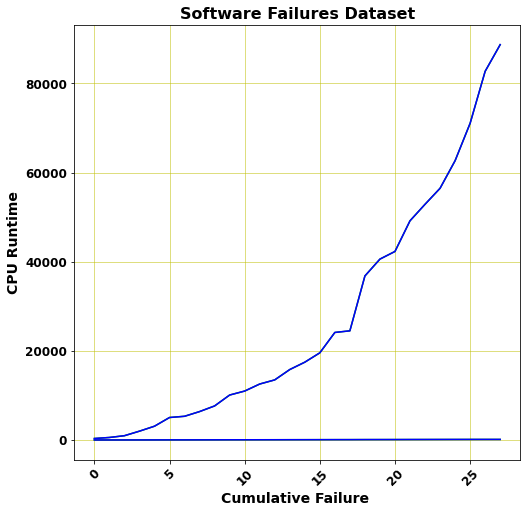

In [28]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(8, 8))
plt.plot(trainset1, color='g',label="Actual")
plt.plot(test_plt,color='b', label="DWCM")
plt.title('Software Failures Dataset', weight='bold', fontsize=16)
plt.ylabel('CPU Runtime', weight='bold', fontsize=14)
plt.xlabel('Cumulative Failure ', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)